# **Installs**

In [ ]:
!pip install umap
!pip install umap-learn -i https://mirrors.ustc.edu.cn/pypi/web/simple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Import libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# **Data description**

- It has 2075259 measurements gathered in a house located in Sceaux
- It has 9 features
- 1.**date**: Date in format dd/mm/yyyy
- 2.**time**: time in format hh:mm:ss
- 3.**global_active_power**: household global minute-averaged active power
    (in kilowatt)
- 4.**global_reactive_power**: household global minute-averaged reactive power (in kilowatt)
- 5.**voltage**: minute-averaged voltage (in volt)
- 6.**global_intensity**: household global minute-averaged current intensity (inampere)
- 7.**sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- 8.**sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- 9.**sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# **Data loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt',sep  = ';',parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt',sep  = ';',parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'],index_col='dt')

# **Data Analysis, Exploration and Visualization.**

In [ ]:
df.shape

(2075259, 8)

In [ ]:
df['month']=df['dt'].dt.month
df['day']=df['dt'].dt.day
df['hour']=df['dt'].dt.hour
df['year']=df['dt'].dt.year

In [ ]:
df=df.iloc[:,1:] #removing dt

In [ ]:
# Correlations among columns
corr=df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month,day,hour,year
Global_active_power,1.000000,0.269329,-0.325213,0.995372,0.335149,0.186016,0.603609,-0.055014,-0.010150,0.310451,0.041311
Global_reactive_power,0.269329,1.000000,-0.094443,0.297814,0.117254,0.432778,0.071743,0.026822,0.000238,0.110058,0.041528
Voltage,-0.325213,-0.094443,1.000000,-0.349364,-0.182835,-0.093046,-0.183980,-0.026007,0.025319,-0.176737,0.245172
Global_intensity,0.995372,0.297814,-0.349364,1.000000,0.336599,0.200708,0.600211,-0.049123,-0.009540,0.313332,0.027765
Sub_metering_1,0.335149,0.117254,-0.182835,0.336599,1.000000,0.056410,0.148258,-0.009046,-0.006525,0.172180,-0.002541
Sub_metering_2,0.186016,0.432778,-0.093046,0.200708,0.056410,1.000000,0.044187,0.009156,0.006910,0.060117,0.028437
Sub_metering_3,0.603609,0.071743,-0.183980,0.600211,0.148258,0.044187,1.000000,0.000988,-0.004215,0.099992,0.243665
month,-0.055014,0.026822,-0.026007,-0.049123,-0.009046,0.009156,0.000988,1.000000,0.019899,0.000211,-0.081550
day,-0.010150,0.000238,0.025319,-0.009540,-0.006525,0.006910,-0.004215,0.019899,1.000000,-0.000147,-0.024409
hour,0.310451,0.110058,-0.176737,0.313332,0.172180,0.060117,0.099992,0.000211,-0.000147,1.000000,-0.000602


In [ ]:
df = df.drop("Global_intensity",axis=1) #corr
df = df.drop("Sub_metering_2",axis=1) #corr
df2 = df2.drop("Global_intensity",axis=1) #corr


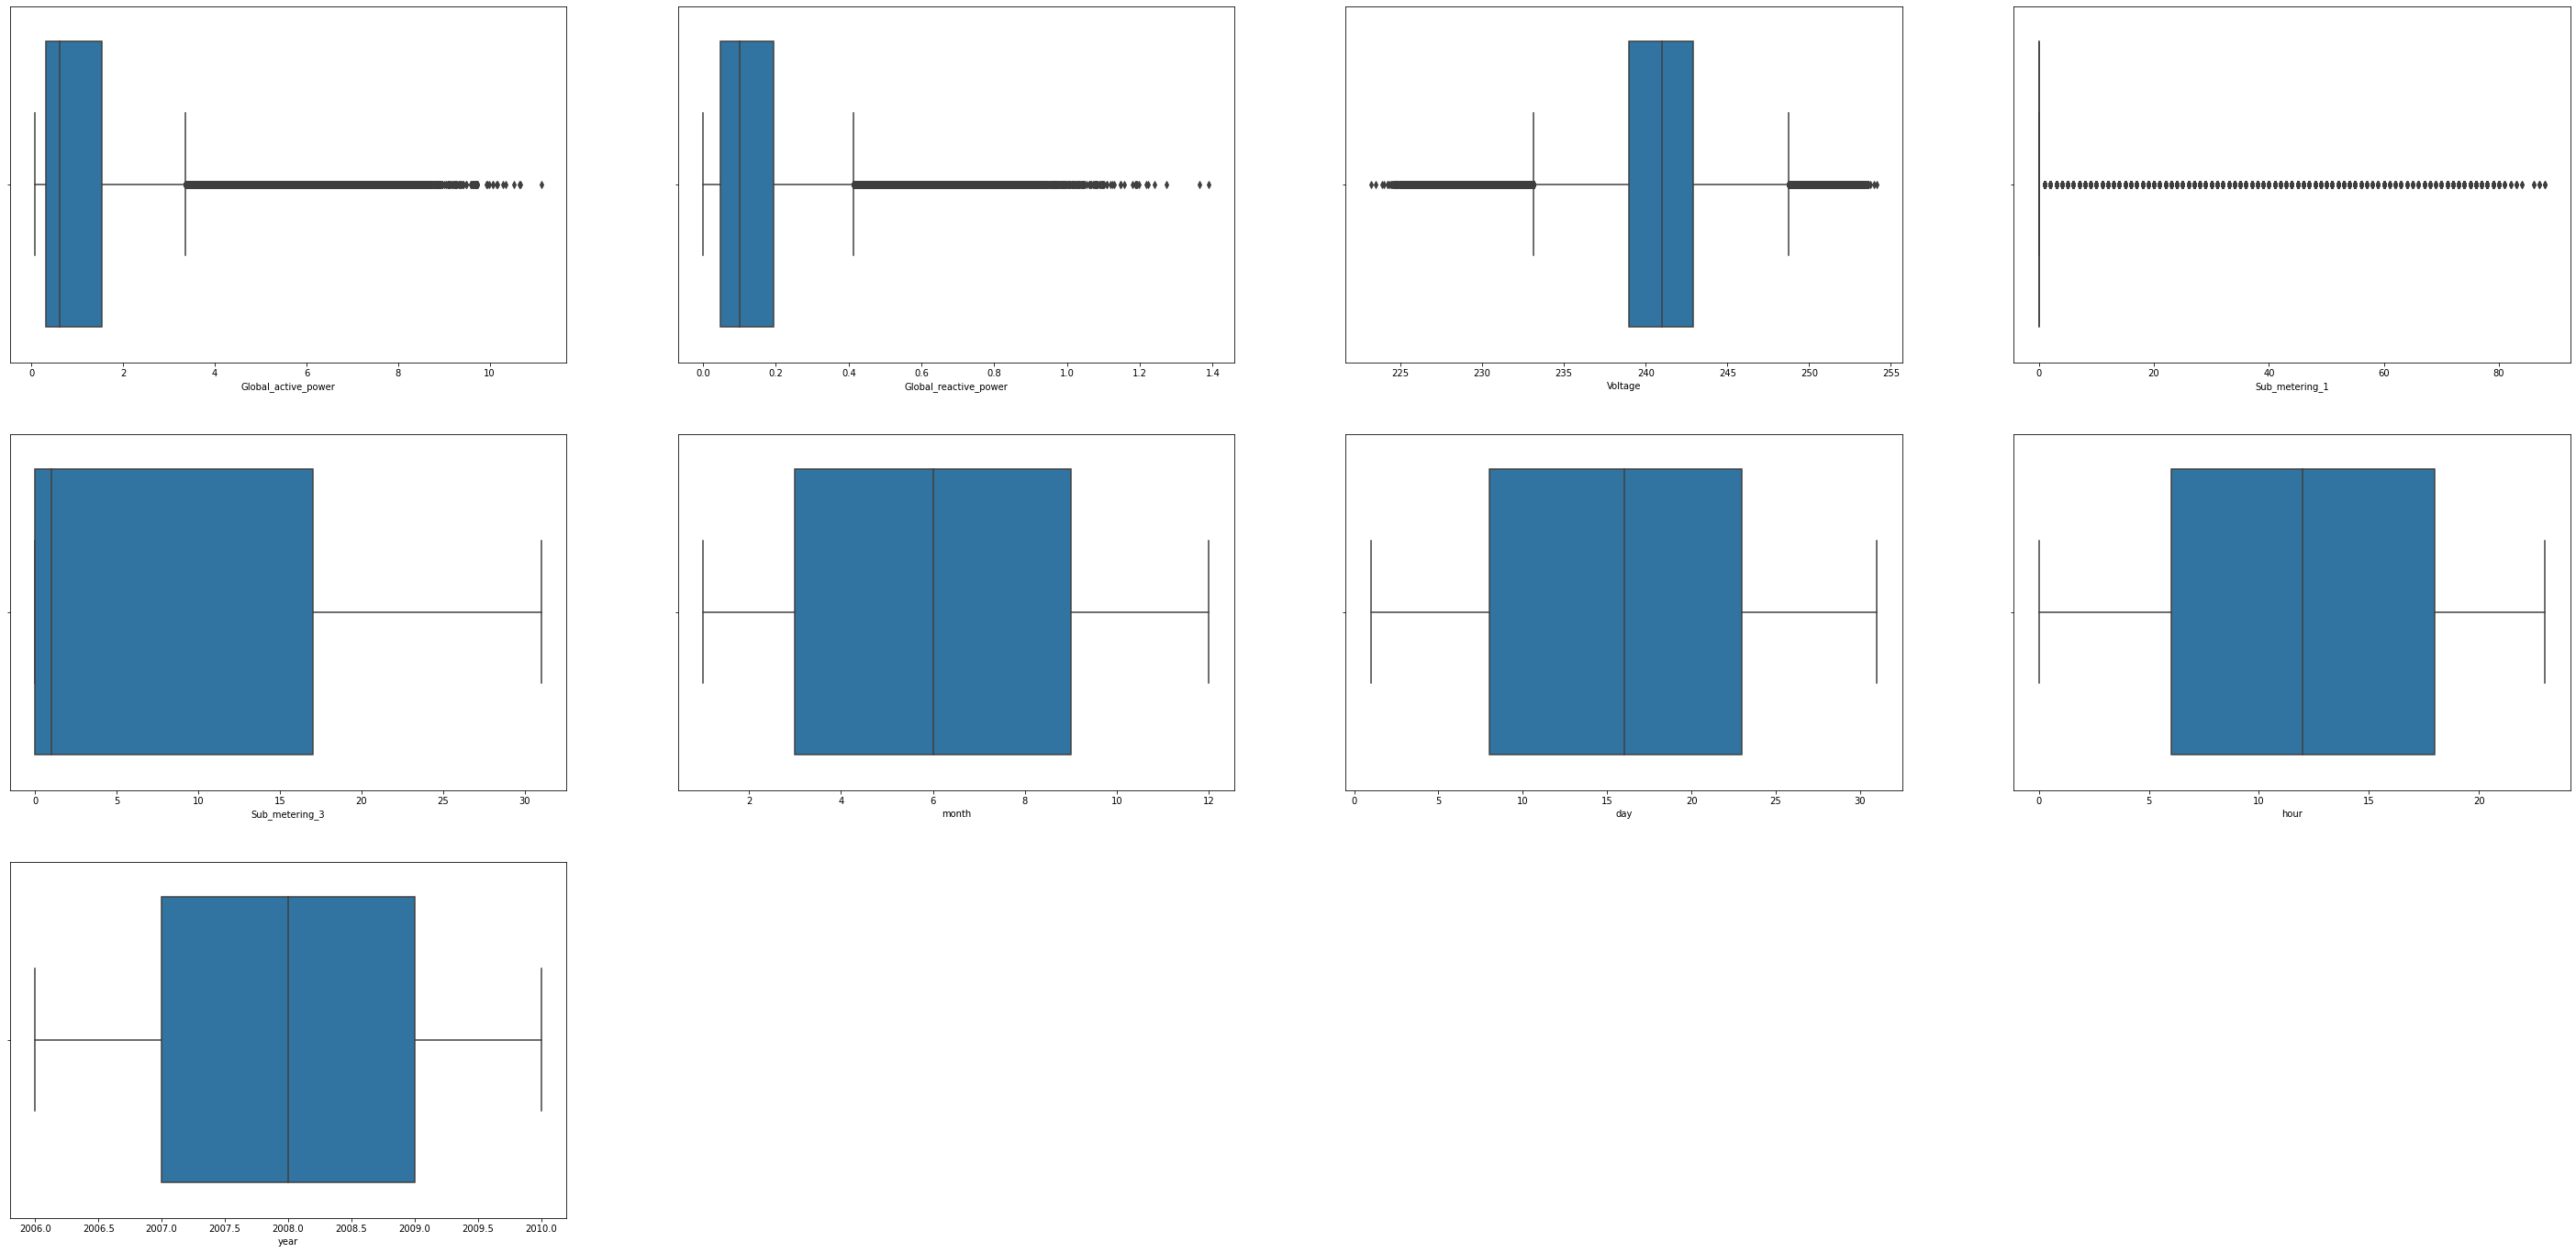

In [ ]:
#checking outlires
fig = plt.figure(figsize=(50,50))
for index,col in enumerate(df.columns):
    plt.subplot(6,4,index+1)
    sns.boxplot(df.loc[:,col])


In [ ]:
#percentage of outlires
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0])*100

Global_active_power      4.573260
Global_reactive_power    1.947709
Voltage                  2.460753
Sub_metering_1           8.148621
Sub_metering_3           0.000000
month                    0.000000
day                      0.000000
hour                     0.000000
year                     0.000000
dtype: float64

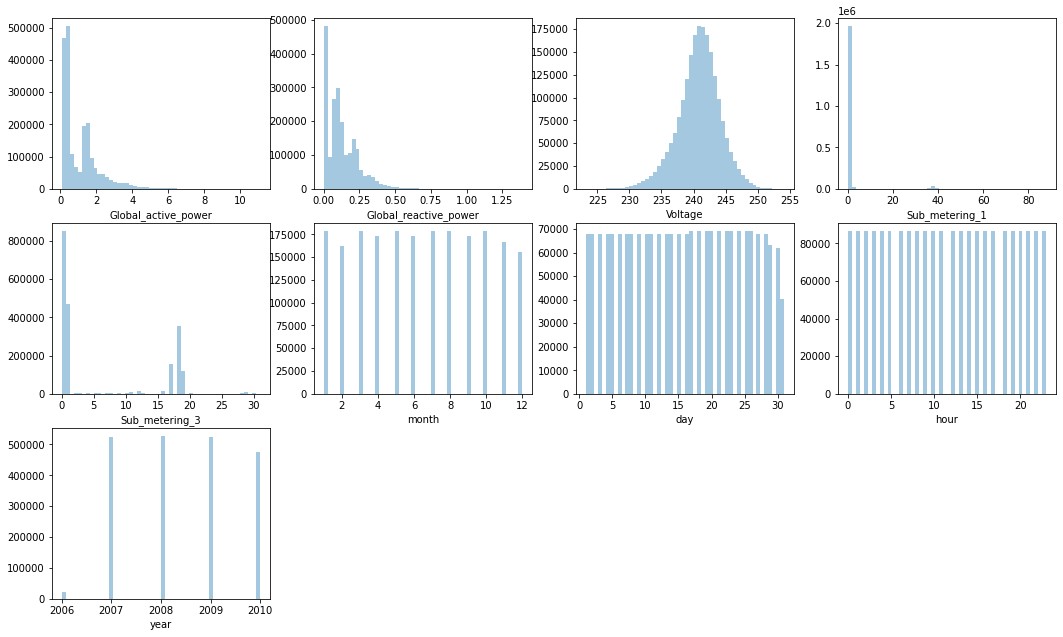

In [ ]:
#distribution
fig = plt.figure(figsize=(18,22))
for index,col in enumerate(df.columns):
    plt.subplot(6,4,index+1)
    sns.distplot(df.loc[:,col].dropna(), kde=False)

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_3,month,day,hour,year
0,4.216,0.418,234.84,0.0,17.0,12,16,17,2006
1,5.360,0.436,233.63,0.0,16.0,12,16,17,2006
2,5.374,0.498,233.29,0.0,17.0,12,16,17,2006
3,5.388,0.502,233.74,0.0,17.0,12,16,17,2006
4,3.666,0.528,235.68,0.0,17.0,12,16,17,2006


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_3,month,day,hour,year
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,1.121923e+00,6.458447e+00,6.450359e+00,1.577363e+01,1.150076e+01,2.008437e+03
std,1.057294e+00,1.127220e-01,3.239987e+00,6.153031e+00,8.437154e+00,3.415762e+00,8.787773e+00,6.922227e+00,1.128677e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.006000e+03
25%,3.080000e-01,4.800000e-02,2.389900e+02,0.000000e+00,0.000000e+00,3.000000e+00,8.000000e+00,6.000000e+00,2.007000e+03
50%,6.020000e-01,1.000000e-01,2.410100e+02,0.000000e+00,1.000000e+00,6.000000e+00,1.600000e+01,1.200000e+01,2.008000e+03
75%,1.528000e+00,1.940000e-01,2.428900e+02,0.000000e+00,1.700000e+01,9.000000e+00,2.300000e+01,1.800000e+01,2.009000e+03
max,1.112200e+01,1.390000e+00,2.541500e+02,8.800000e+01,3.100000e+01,1.200000e+01,3.100000e+01,2.300000e+01,2.010000e+03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Sub_metering_1         float64
 4   Sub_metering_3         float64
 5   month                  int64  
 6   day                    int64  
 7   hour                   int64  
 8   year                   int64  
dtypes: float64(5), int64(4)
memory usage: 142.5 MB


In [ ]:
df2=df2.resample('D').mean()

In [ ]:
df2

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,
2006-12-16,3.053475,0.088187,236.243763,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,0.000000,1.838889,9.765972
...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,3.371528,1.465278,7.038889
2010-11-23,1.095511,0.095451,240.575528,1.299306,0.318056,5.285417
2010-11-24,1.247394,0.091986,240.030965,0.761111,1.977778,8.488889


# **Data Cleaning and Preprocessing**

In [ ]:
df.isna().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Sub_metering_1           25979
Sub_metering_3           25979
month                        0
day                          0
hour                         0
year                         0
dtype: int64

In [ ]:
df2.isna().sum()

Global_active_power      9
Global_reactive_power    9
Voltage                  9
Sub_metering_1           9
Sub_metering_2           9
Sub_metering_3           9
dtype: int64

In [ ]:
df.dropna(inplace=True)
df2.dropna(inplace=True)

In [ ]:
num = df.duplicated().sum()
num

11339

In [ ]:
df.drop_duplicates(inplace=True)

# **Data Splitting**

In [ ]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)
train2=df2.sample(frac=0.8,random_state=200) #random state is a seed value
test2=df2.drop(train2.index)

In [ ]:
StandardScaler = StandardScaler()
scaled_train= StandardScaler.fit_transform(train)
scaled_train = pd.DataFrame(scaled_train, columns = train.columns)

In [ ]:
scaled_test = StandardScaler.transform(test)
scaled_test = pd.DataFrame(scaled_test, columns = test.columns)

In [ ]:
scaled_train2= StandardScaler.fit_transform(train2)
scaled_train2 = pd.DataFrame(scaled_train2, columns = train2.columns)

In [ ]:

scaled_test2 = StandardScaler.transform(test2)
scaled_test2 = pd.DataFrame(scaled_test2, columns = test2.columns)

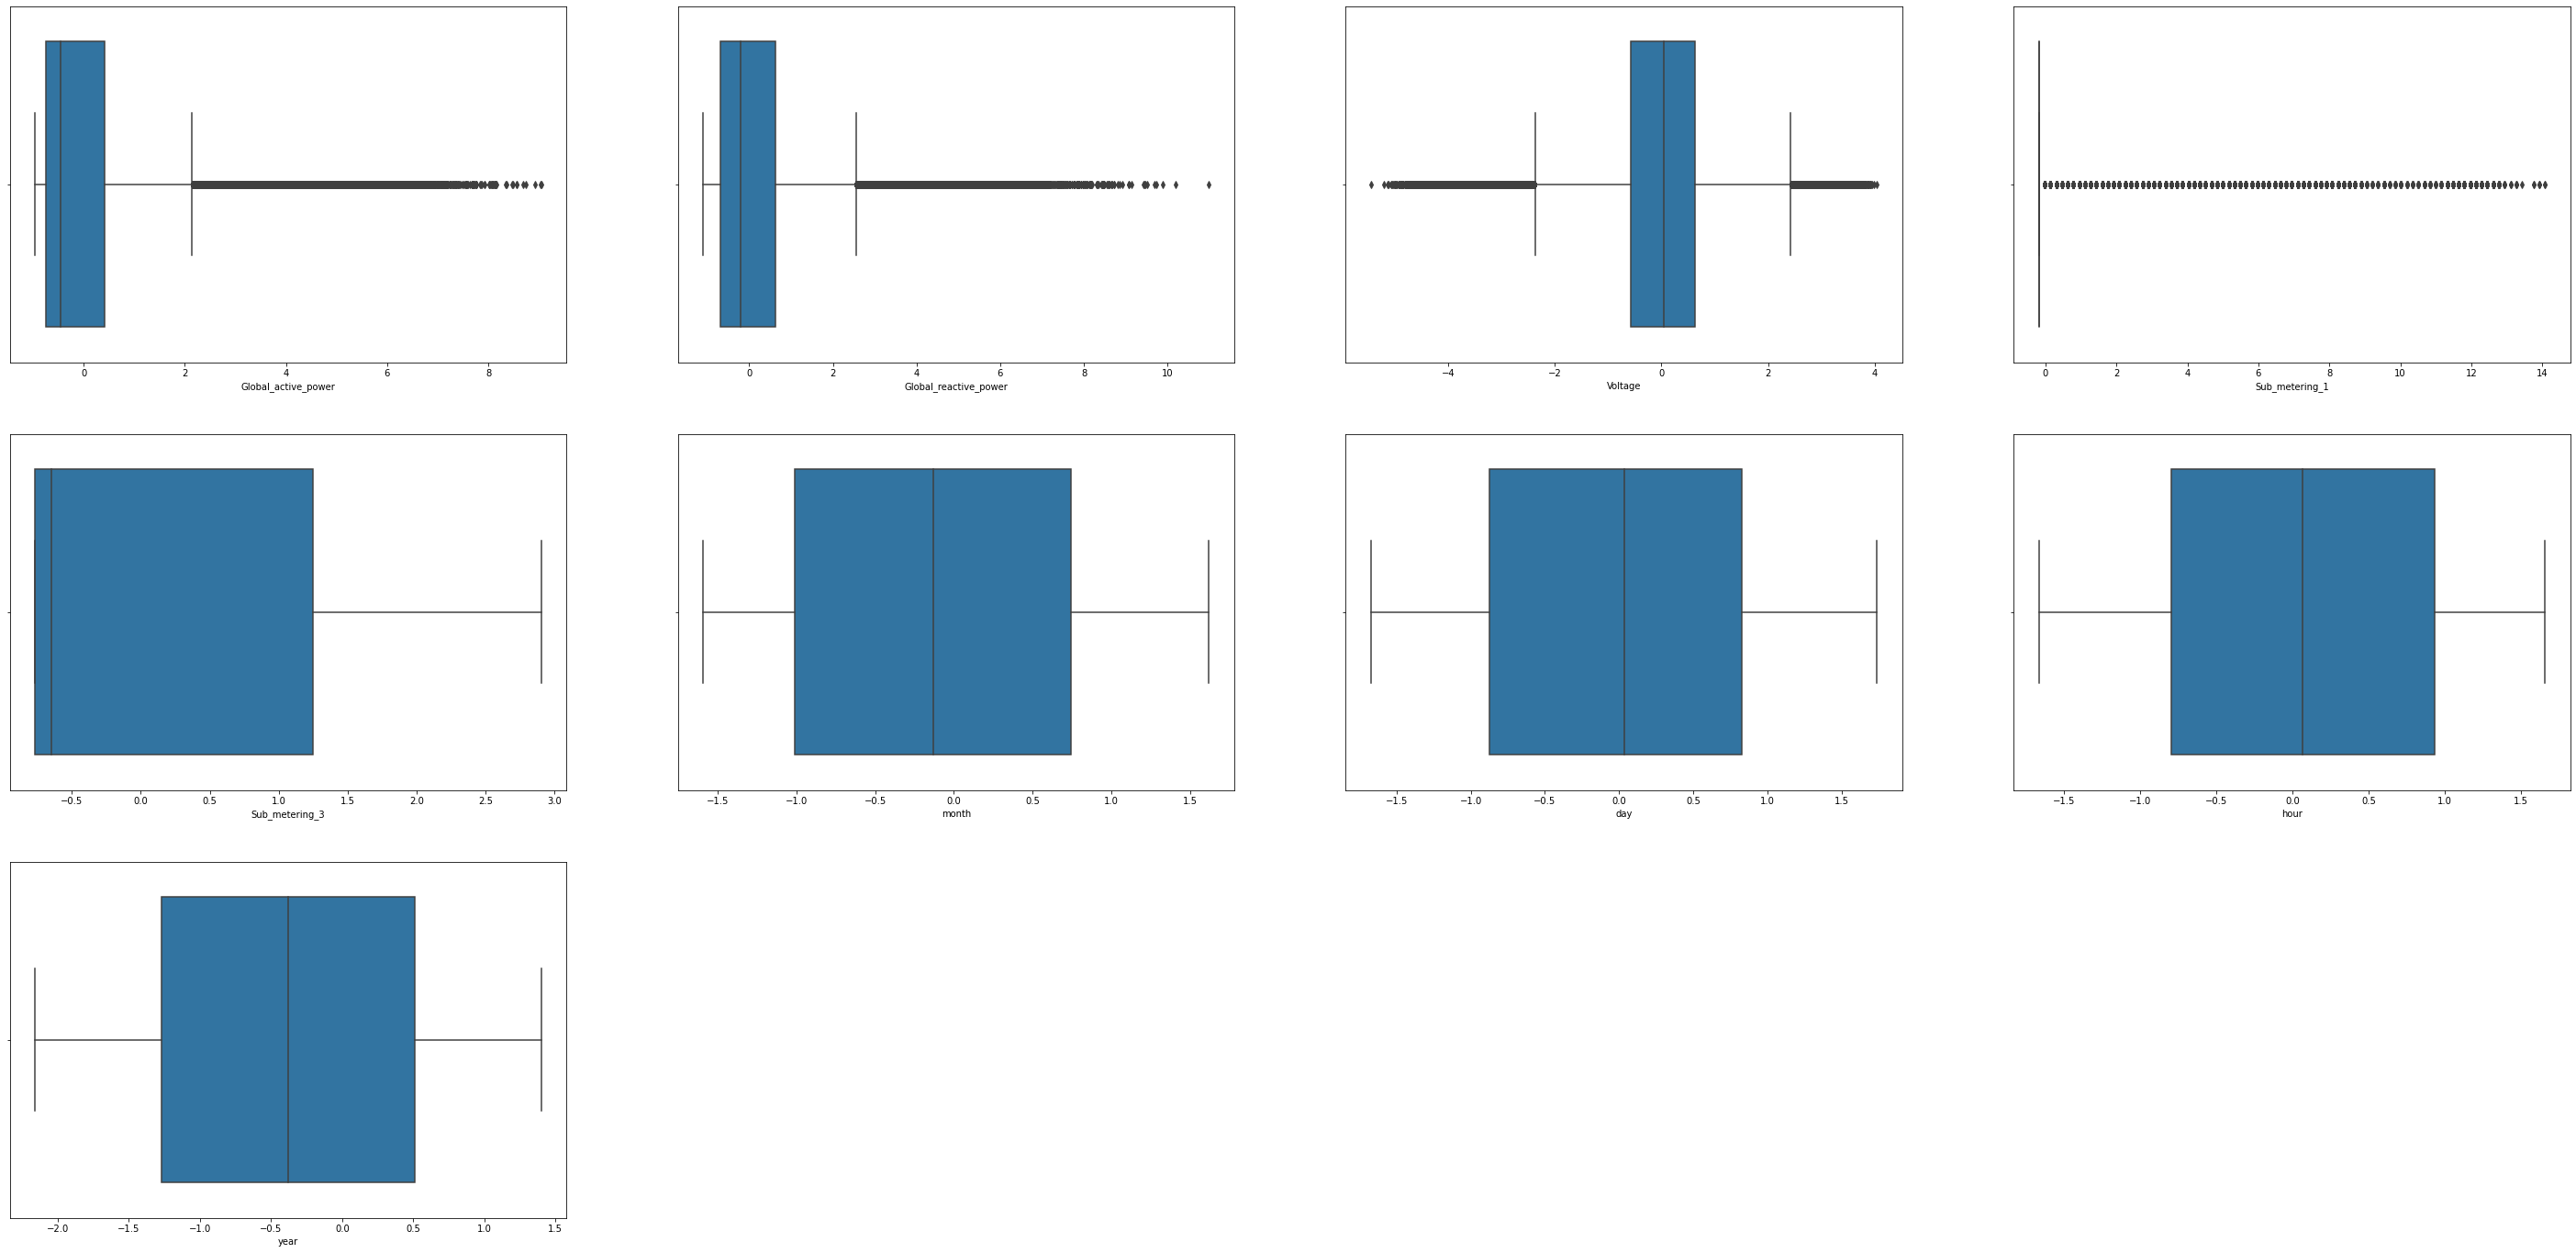

In [ ]:
#checking outlires
fig = plt.figure(figsize=(50,50))
for index,col in enumerate(scaled_train.columns):
    plt.subplot(6,4,index+1)
    sns.boxplot(scaled_train.loc[:,col])

In [ ]:
#percentage of outlires
Q1 = scaled_train.quantile(0.25)
Q3 = scaled_train.quantile(0.75)
IQR = Q3 - Q1
(((scaled_train < (Q1 - 1.5 * IQR)) | (scaled_train > (Q3 + 1.5 * IQR))).sum()/scaled_train.shape[0])*100

Global_active_power      4.637155
Global_reactive_power    1.987484
Voltage                  2.519700
Sub_metering_1           8.293971
Sub_metering_3           0.000000
month                    0.000000
day                      0.000000
hour                     0.000000
year                     0.000000
dtype: float64

In [ ]:
print("test shape is:",test.shape)
print("train shape is:",train.shape)
print("test2 shape is:",test2.shape)
print("train2 shape is:",train2.shape)

test shape is: (407588, 9)
train shape is: (1630353, 9)
test2 shape is: (287, 6)
train2 shape is: (1146, 6)


# **Model**

**Parameters: K which is the number of clusters**

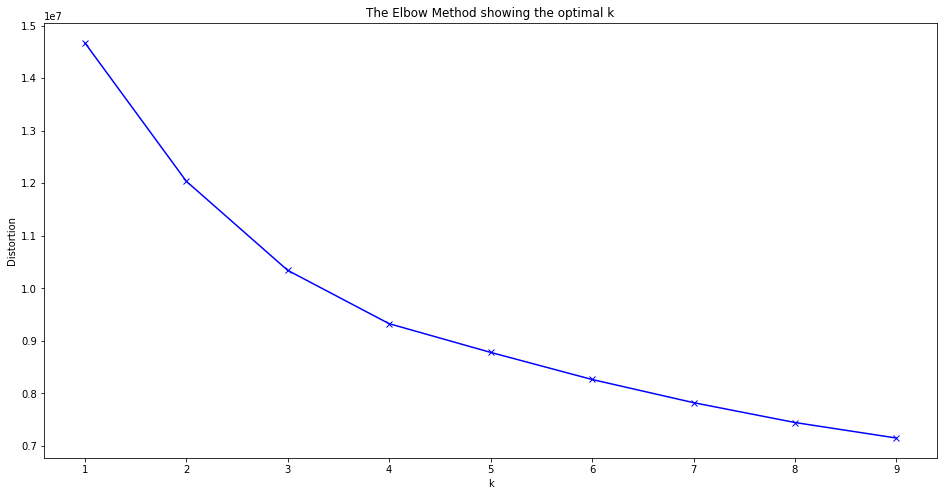

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_train)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# **Evaluation**

**The best number of clusters is 5 from the elbow method**

In [ ]:
K =4
predictions = KMeans(n_clusters = K).fit_predict(scaled_test)
predictions

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

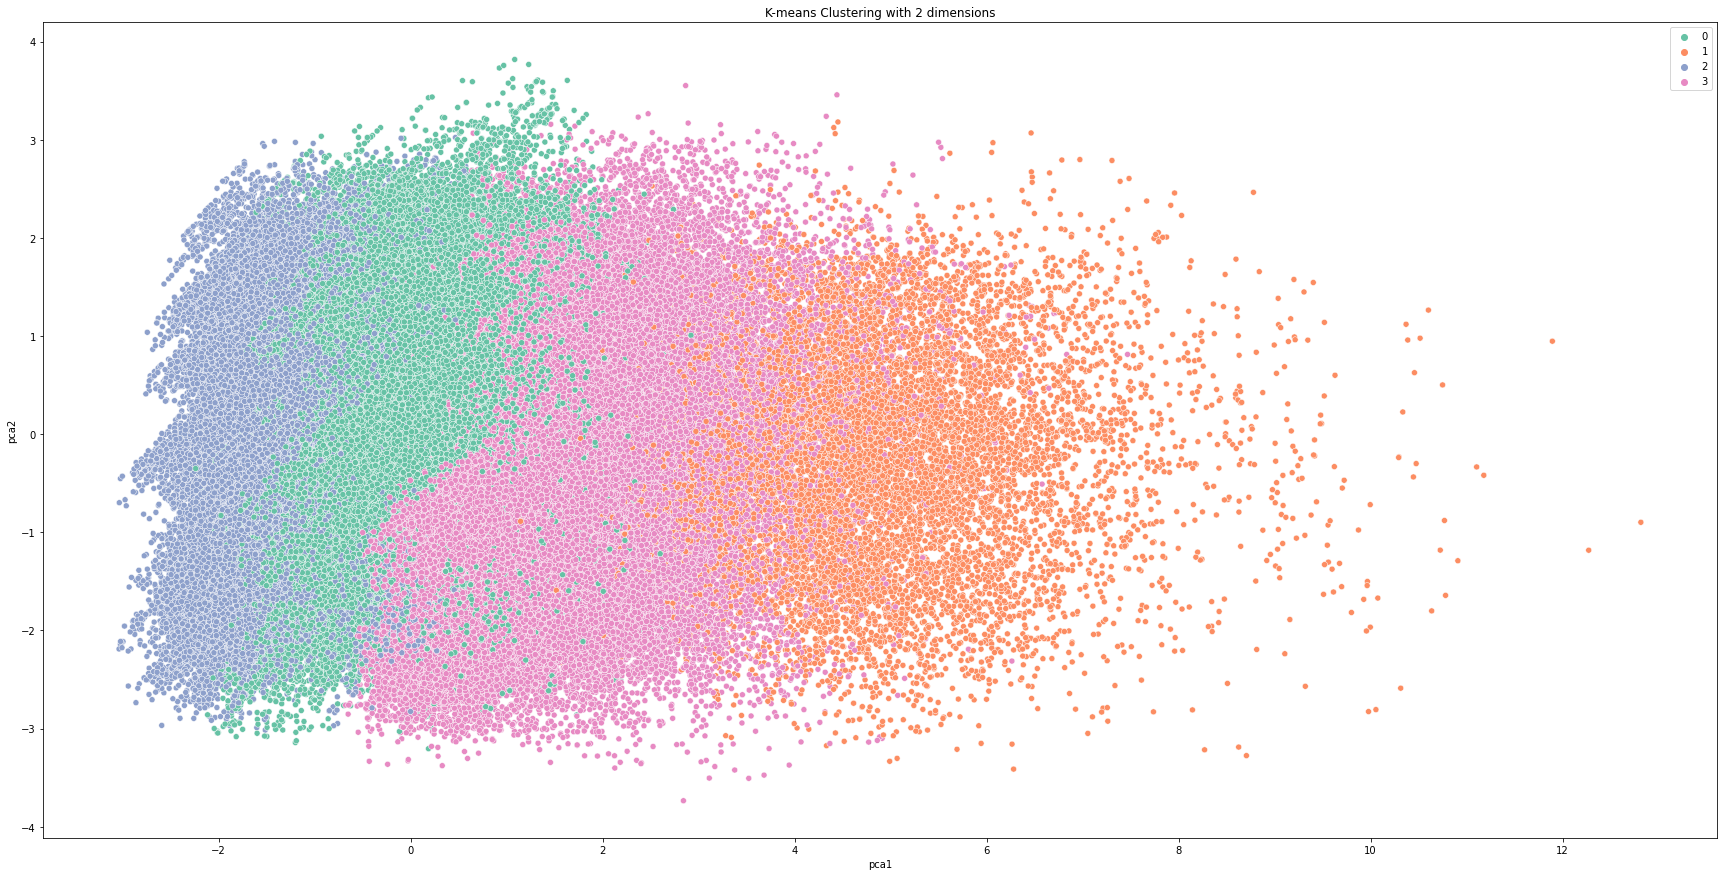

In [ ]:
#dimentionally reduction
reduced_data = PCA(n_components = 2).fit_transform(scaled_test)
results = pd.DataFrame(reduced_data,columns = ['pca1','pca2'])
fig = plt.figure(figsize=(30,15))
sns.scatterplot(x = "pca1", y = "pca2", hue =  predictions,
                data = results,palette=sns.color_palette( 'Set2', n_colors=4), ) # hue produce points with diff colors
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
test['consumption'] = ((test.Global_active_power)*1000/60) - (test.Sub_metering_1  + test.Sub_metering_3)


mean consumption of Cluster1


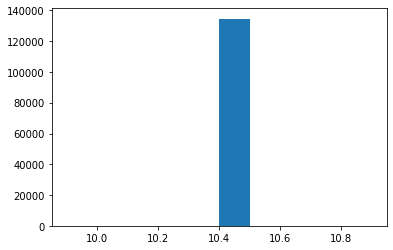

mean consumption of Cluster2


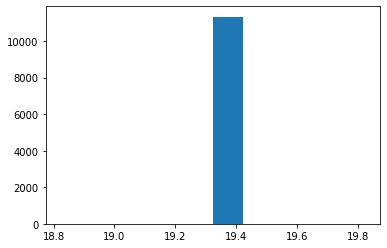

mean consumption of Cluster3


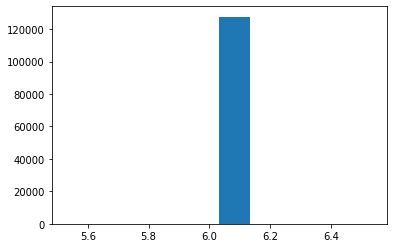

mean consumption of Cluster4


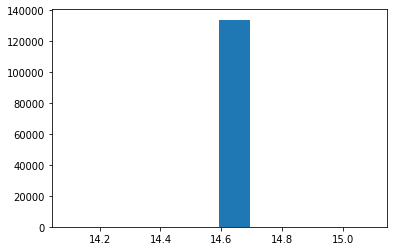

In [ ]:
for i in range(K):

  f0=test[predictions == i]
  f0['consumption'] =f0['consumption'].mean()
  print("mean consumption of Cluster"+str(i+1))
  plt.hist(f0['consumption'])
  plt.show()

# **Interpretation**

**Each cluster has mean consumption different from other clusters**


In [ ]:
for i in range(K):
    print("The mean consumption of cluster " + str(i+1) + " is: " + str(test[predictions==i]["consumption"].mean()))


The mean consumption of cluster 1 is: 10.400812839044006
The mean consumption of cluster 2 is: 19.32390197981938
The mean consumption of cluster 3 is: 6.032485238609844
The mean consumption of cluster 4 is: 14.59336061167194


In [ ]:
df2['consumption'] = ((df2.Global_active_power)*1000/60) - (df2.Sub_metering_1+df2.Sub_metering_2  +df2.Sub_metering_3 )

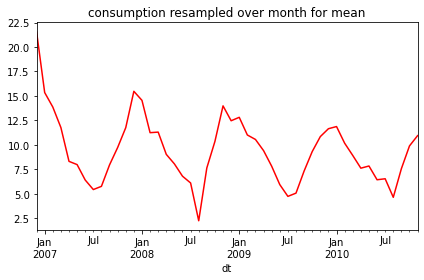

In [ ]:
df2.consumption.resample('M').mean().plot(title='consumption resampled over month for mean', color='red')
plt.tight_layout()
plt.show()

# **Gropping data over Day**



In [ ]:
df2

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,consumption
dt,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,0.000000,1.378788,12.439394,37.073064
2006-12-17,2.354486,0.156949,240.087028,1.411806,2.907639,9.264583,25.657407
2006-12-18,1.530435,0.112356,241.231694,0.738194,1.820139,9.734722,13.214190
2006-12-19,1.157079,0.104821,241.999313,0.582639,5.279167,4.303472,9.119375
2006-12-20,1.545658,0.111804,242.308062,0.000000,1.838889,9.765972,14.156111
...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,3.371528,1.465278,7.038889,11.753194
2010-11-23,1.095511,0.095451,240.575528,1.299306,0.318056,5.285417,11.355741
2010-11-24,1.247394,0.091986,240.030965,0.761111,1.977778,8.488889,9.562130


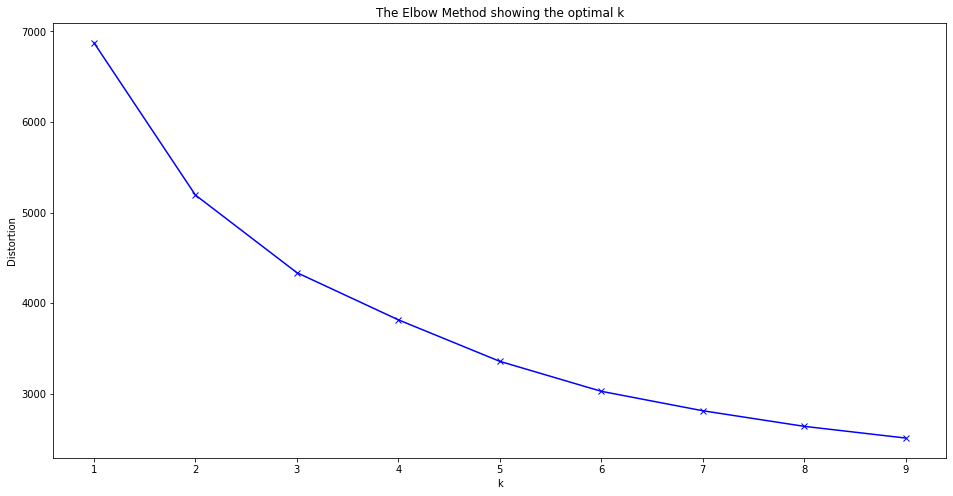

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_train2)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
K =3
predictions = KMeans(n_clusters = K).fit_predict(scaled_test2)
predictions

array([1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1,
       0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0], dtype=int32)

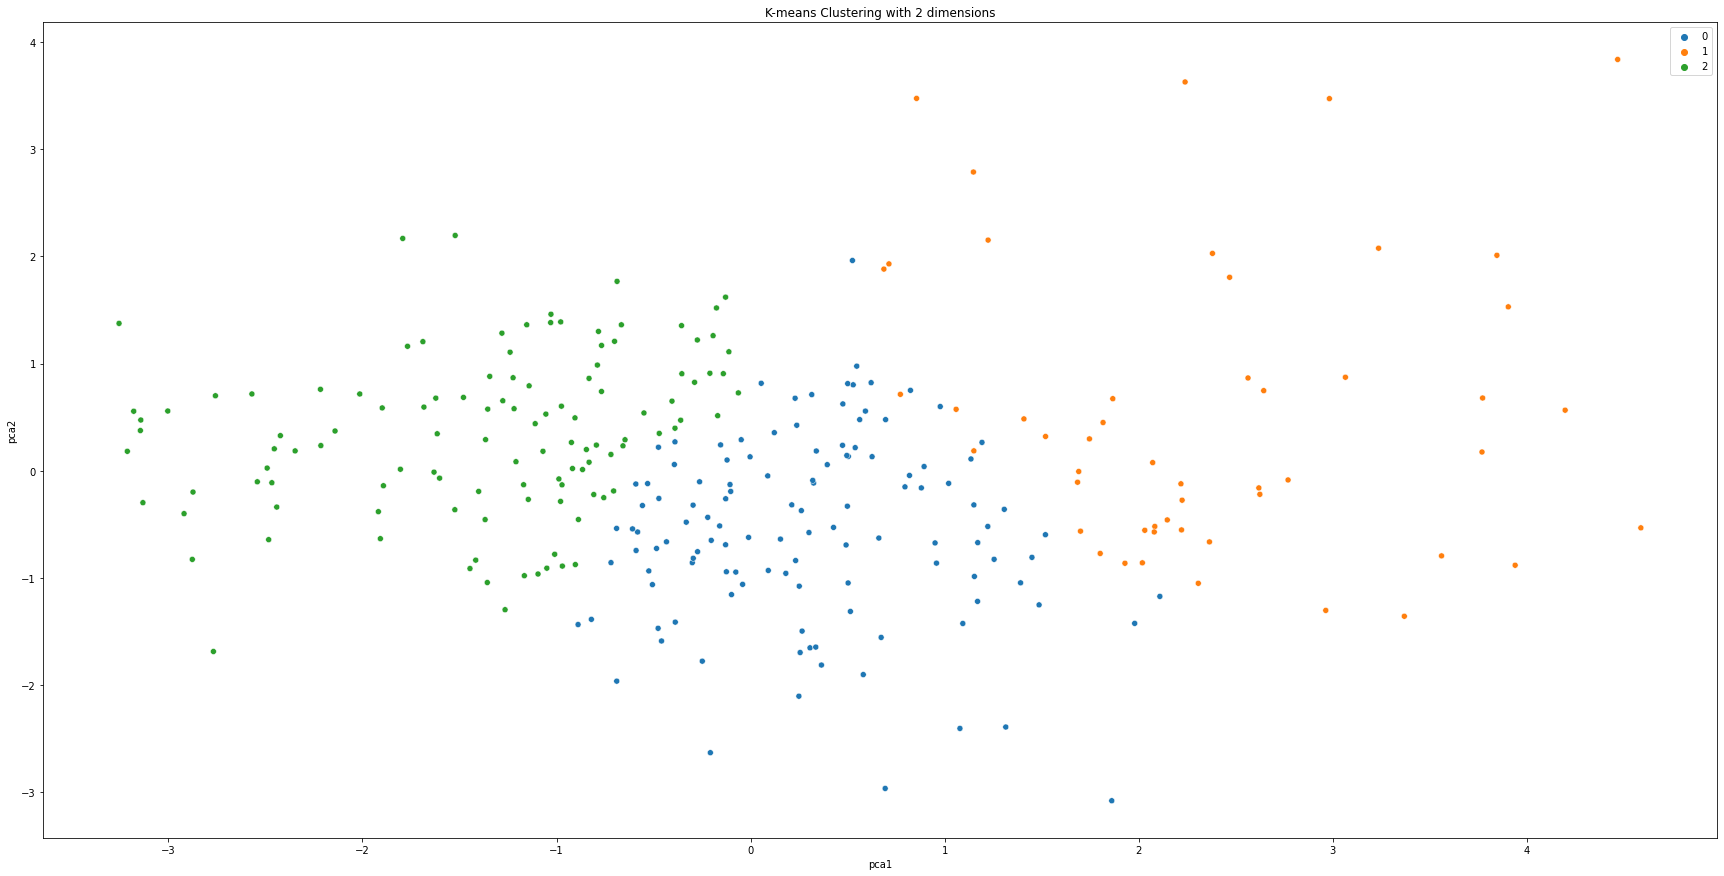

In [ ]:
#dimentionally reduction
reduced_data = PCA(n_components = 2).fit_transform(scaled_test2)
results = pd.DataFrame(reduced_data,columns = ['pca1','pca2'])
fig = plt.figure(figsize=(30,15))
sns.scatterplot(x = "pca1", y = "pca2", hue =  predictions,
                data = results,palette=sns.color_palette( 'tab10', n_colors=3), ) # hue produce points with diff colors
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
test2['consumption'] = ((test2.Global_active_power)*1000/60) - (test2.Sub_metering_1 +test2.Sub_metering_2  + test2.Sub_metering_3)


In [ ]:
for i in range(K):
    print("The mean consumption of cluster " + str(i+1) + " is: " + str(test2[predictions==i]["consumption"].mean()))

The mean consumption of cluster 1 is: 10.063847805797153
The mean consumption of cluster 2 is: 13.507346071292906
The mean consumption of cluster 3 is: 6.670854406916684
